## Seasonal decompose
A method used in time series to represent a time series as a sum (or, sometimes, a product) of three components - the linear trend, the periodic (seasonal) component, and random residuals.

In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

In [2]:
plt.style.use('ggplot')

In [3]:
df_energy_2019 = pd.read_csv('../../data/prepared/df_energy_2019.csv')
df_energy_2020 = pd.read_csv('../../data/prepared/df_energy_2020.csv')
df_energy_2021 = pd.read_csv('../../data/prepared/df_energy_2021.csv')

In [4]:
df_energy_2019_to_2021 = pd.concat([df_energy_2019, df_energy_2020, df_energy_2021])
df_energy_2019_to_2021.head()

,datetime,nuclear_power,not_renewable,renewable,energy_price,date,day_of_week,time,total_energy_feeding
0,2019-01-01 00:00:00,8892.407,25424.272,31947.038,10.07,2019-01-01,Tuesday,00:00:00,66263.717
1,2019-01-01 00:15:00,8681.530,24780.327,32453.560,10.07,2019-01-01,Tuesday,00:15:00,65915.417
2,2019-01-01 00:30:00,8443.552,24263.619,33072.850,10.07,2019-01-01,Tuesday,00:30:00,65780.021
3,2019-01-01 00:45:00,8101.865,23910.911,33369.737,10.07,2019-01-01,Tuesday,00:45:00,65382.513
4,2019-01-01 01:00:00,8041.866,23552.715,33044.778,-4.08,2019-01-01,Tuesday,01:00:00,64639.359


In [5]:
df_energy_2019_to_2021['datetime'] = pd.to_datetime(df_energy_2019_to_2021['datetime'])

In [6]:
df_energy_2019_to_2021.set_index('datetime', inplace=True)
df_energy_2019_to_2020_by_day = df_energy_2019_to_2021.resample('D').mean(numeric_only=True)
df_energy_2019_to_2020_by_day.to_csv('../../data/prepared/df_energy_2019_to_2020_by_day.csv')


In [7]:
df_energy_2019_to_2020_by_day.head()

,nuclear_power,not_renewable,renewable,energy_price,total_energy_feeding
datetime,,,,,
2019-01-01,7001.636302,22369.950031,41938.015562,-6.875833,71309.601896
2019-01-02,8355.094302,34774.248375,36523.993490,29.104167,79653.336167
2019-01-03,9476.434188,53702.416698,20382.464510,58.042083,83561.315396
2019-01-04,9216.785667,47435.312927,30791.745510,48.917083,87443.844104
2019-01-05,9144.890354,40887.236937,32517.613333,43.155417,82549.740625


### Using model additive

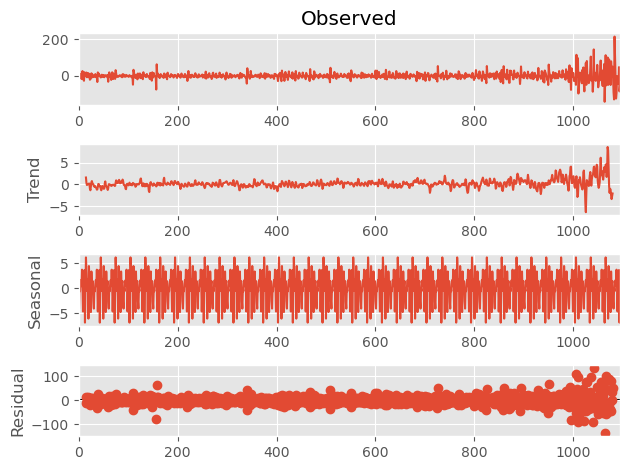

In [9]:
trends = sm.tsa.seasonal_decompose(df_energy_2019_to_2020_by_day['energy_price'].diff().dropna().values, model='additive', period=30).plot()